# Import Libraries and Load Data

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\Shaik Samiulla\Downloads\Crowd data for anomaly detection (1).csv")


# Data Understanding

In [92]:
print(f"Data shape: {data.shape}") 
print(data.info())  


Data shape: (24123, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB
None


# Data Preprocessing

In [93]:
data.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


In [94]:
data.tail()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
24118,0:14:55,0.3559,20.4337,0.9835,89.1479,139,1.39,-0.0029,1,0,normal,0
24119,0:14:56,0.3657,20.4616,1.0152,88.4519,142,1.42,0.0306,1,0,normal,0
24120,0:14:57,0.3695,20.4869,1.0084,89.4419,139,1.39,-0.0019,1,0,normal,0
24121,0:14:58,0.3580,20.4423,1.0107,90.5225,139,1.39,0.0130,1,0,normal,0
24122,0:14:59,0.3551,20.5512,1.0151,89.7595,139,1.39,0.0100,1,0,normal,0


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


# Data Cleaning

In [96]:
data.nunique()

timestamp            3587
X                    2885
Y                   16693
Speed                8137
Heading             18620
AgentCount            819
Density               819
Acc                  1215
LevelOfCrowdness        5
label                   2
label2                  2
Severity_level          4
dtype: int64

In [97]:
data.isnull().sum()

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64

In [98]:
(data.isnull().sum()/(len(data)))*100

timestamp           0.000000
X                   0.000000
Y                   0.000000
Speed               0.000000
Heading             0.000000
AgentCount          0.000000
Density             0.000000
Acc                 0.431124
LevelOfCrowdness    0.000000
label               0.000000
label2              0.000000
Severity_level      0.000000
dtype: float64

In [99]:
data = data.drop(['X'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   Y                 24123 non-null  float64
 2   Speed             24123 non-null  float64
 3   Heading           24123 non-null  float64
 4   AgentCount        24123 non-null  int64  
 5   Density           24123 non-null  float64
 6   Acc               24019 non-null  float64
 7   LevelOfCrowdness  24123 non-null  int64  
 8   label             24123 non-null  int64  
 9   label2            24123 non-null  object 
 10  Severity_level    24123 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 2.0+ MB


# Exploratory Data Analysis (EDA)

In [100]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,24123.0,19.989362,1.205473,11.1627,19.57570,20.2886,20.6929,23.7717
Speed,24123.0,0.742941,0.279331,0.1244,0.49670,0.7843,1.0059,1.5678
Heading,24123.0,90.314782,4.803848,84.3241,88.47595,89.1702,89.7981,138.1621
AgentCount,24123.0,251.092277,167.615884,1.0000,134.00000,187.0000,336.0000,990.0000
Density,24123.0,2.510923,1.676159,0.0100,1.34000,1.8700,3.3600,9.9000
Acc,24019.0,0.004203,0.032528,-1.0313,-0.00140,0.0063,0.0139,0.4555
LevelOfCrowdness,24123.0,2.337064,1.456331,1.0000,1.00000,2.0000,3.0000,5.0000
label,24123.0,0.288977,0.453297,0.0000,0.00000,0.0000,1.0000,1.0000
Severity_level,24123.0,0.509265,0.857201,0.0000,0.00000,0.0000,1.0000,3.0000


In [101]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
timestamp,24123,3587,0:59:49,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y,24123.0,NaN,NaN,NaN,19.989362,1.205473,11.1627,19.5757,20.2886,20.6929,23.7717
Speed,24123.0,NaN,NaN,NaN,0.742941,0.279331,0.1244,0.4967,0.7843,1.0059,1.5678
Heading,24123.0,NaN,NaN,NaN,90.314782,4.803848,84.3241,88.47595,89.1702,89.7981,138.1621
AgentCount,24123.0,NaN,NaN,NaN,251.092277,167.615884,1.0,134.0,187.0,336.0,990.0
Density,24123.0,NaN,NaN,NaN,2.510923,1.676159,0.01,1.34,1.87,3.36,9.9
Acc,24019.0,NaN,NaN,NaN,0.004203,0.032528,-1.0313,-0.0014,0.0063,0.0139,0.4555
LevelOfCrowdness,24123.0,NaN,NaN,NaN,2.337064,1.456331,1.0,1.0,2.0,3.0,5.0
label,24123.0,NaN,NaN,NaN,0.288977,0.453297,0.0,0.0,0.0,1.0,1.0
label2,24123,2,normal,17152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['timestamp', 'label2'], dtype='object')
Numerical Variables:
['Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness', 'label', 'Severity_level']


 # EDA Univariate Analysis

# Box Plot

Y
Skew : -0.77


NameError: name 'X' is not defined

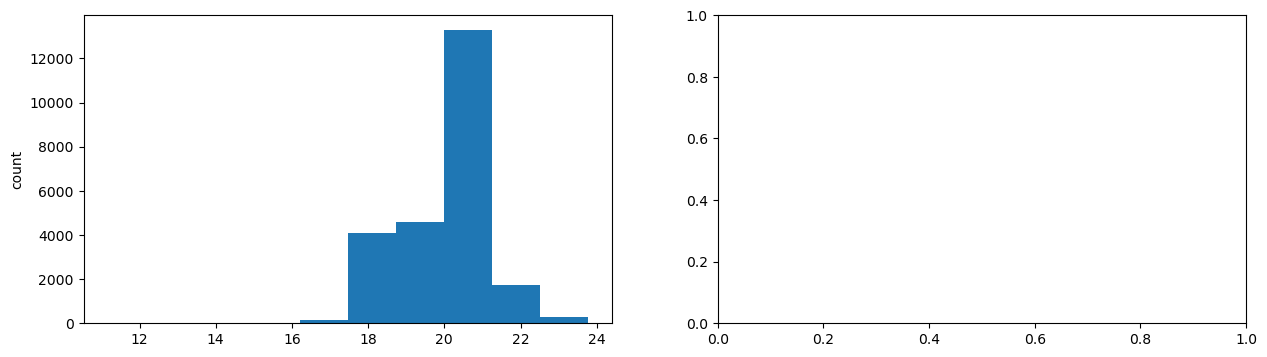

In [103]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    X.boxplot(x=data[col])
    plt.show()

In [104]:
df = pd.DataFrame(data)

In [105]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))


Y
Skew : -0.77
Speed
Skew : -0.26
Heading
Skew : 3.82
AgentCount
Skew : 1.1
Density
Skew : 1.1
Acc
Skew : -10.75
LevelOfCrowdness
Skew : 0.6
label
Skew : 0.93
Severity_level
Skew : 1.34


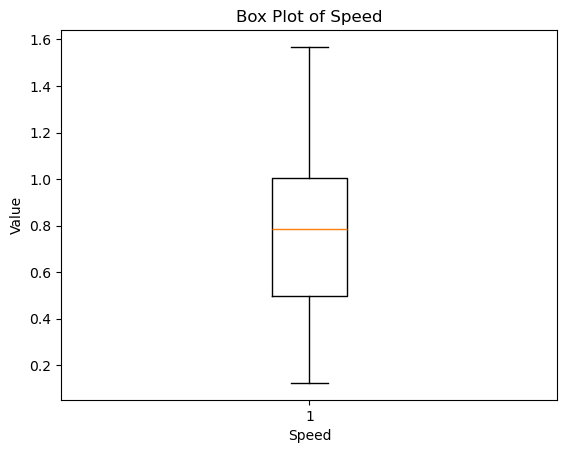

In [106]:
import matplotlib.pyplot as plt
plt.boxplot(df['Speed'])
plt.xlabel('Speed')
plt.ylabel('Value')
plt.title('Box Plot of Speed')
plt.show()


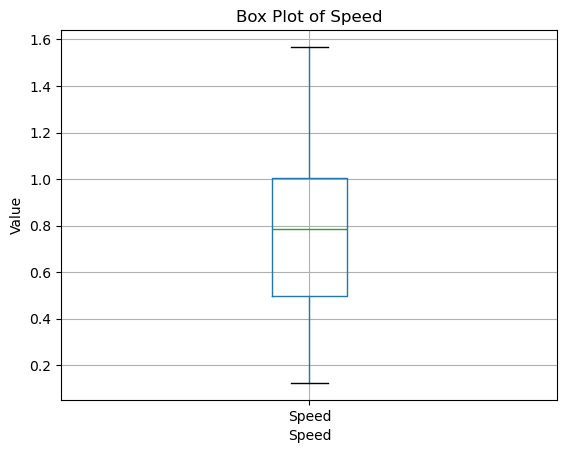

In [107]:
speed_df = pd.DataFrame(df['Speed'])  # Create a DataFrame with just the 'Speed' column
speed_df.boxplot()
plt.xlabel('Speed')
plt.ylabel('Value')
plt.title('Box Plot of Speed')
plt.show()



In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# Load data
df = pd.read_csv(r"C:\Users\Shaik Samiulla\Downloads\Crowd data for anomaly detection (1).csv")

print(df.isnull().sum())




timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64


# Data summary

In [109]:
print(df.describe())

                  X             Y         Speed       Heading    AgentCount  \
count  24123.000000  24123.000000  24123.000000  24123.000000  24123.000000   
mean       0.319789     19.989362      0.742941     90.314782    251.092277   
std        0.067545      1.205473      0.279331      4.803848    167.615884   
min       -1.205900     11.162700      0.124400     84.324100      1.000000   
25%        0.264500     19.575700      0.496700     88.475950    134.000000   
50%        0.325400     20.288600      0.784300     89.170200    187.000000   
75%        0.356800     20.692900      1.005900     89.798100    336.000000   
max        1.966700     23.771700      1.567800    138.162100    990.000000   

            Density           Acc  LevelOfCrowdness         label  \
count  24123.000000  24019.000000      24123.000000  24123.000000   
mean       2.510923      0.004203          2.337064      0.288977   
std        1.676159      0.032528          1.456331      0.453297   
min        0


# Univariate Analysis (histograms)

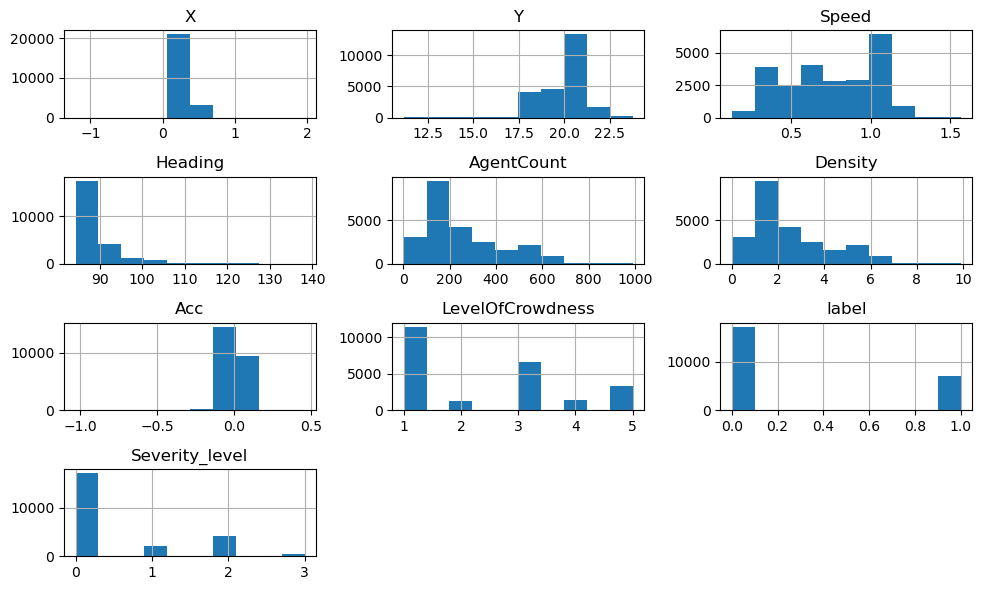

In [114]:
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Univariate Analysis (boxplots)


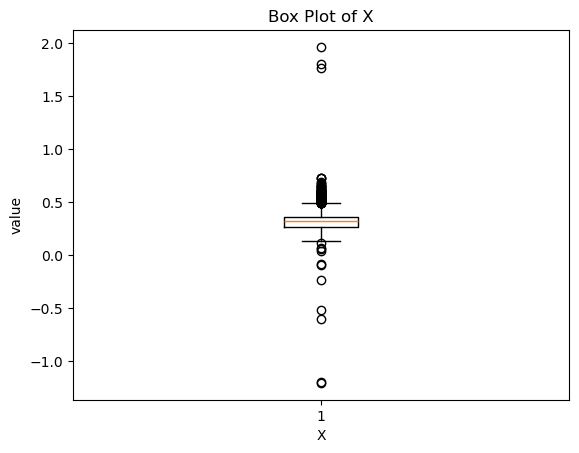

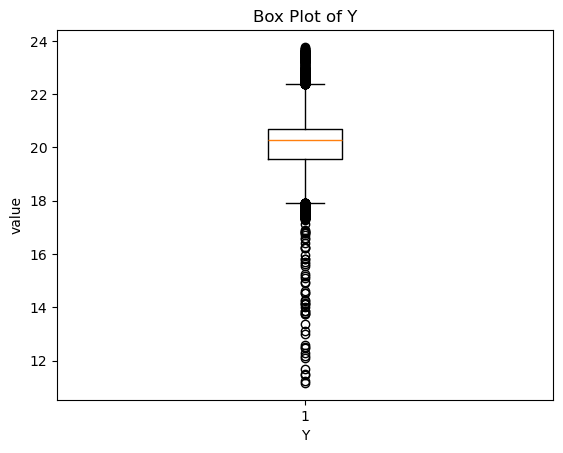

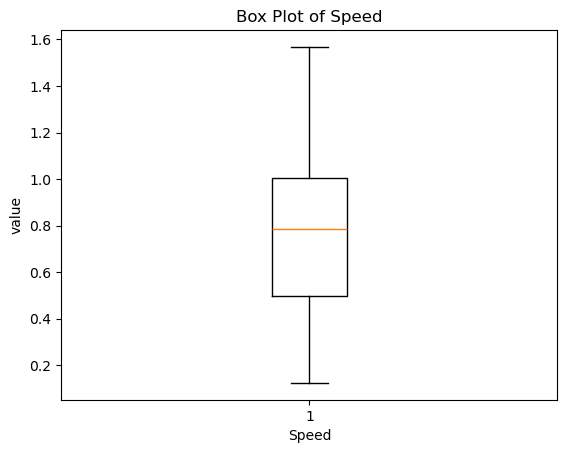

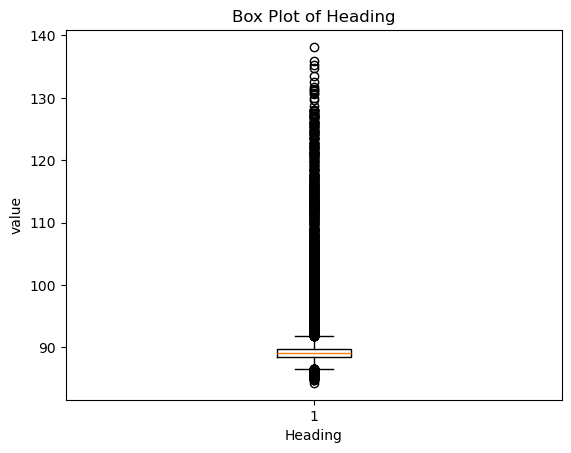

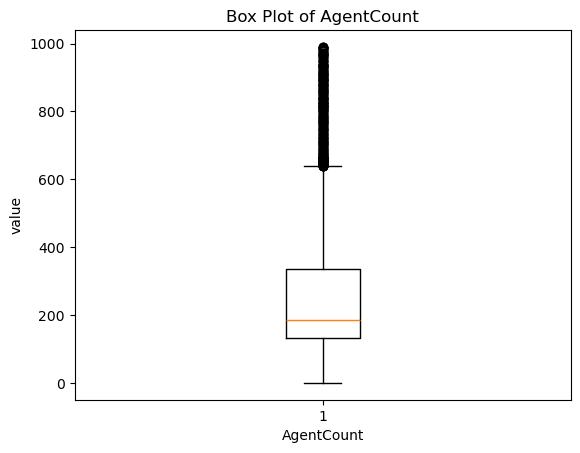

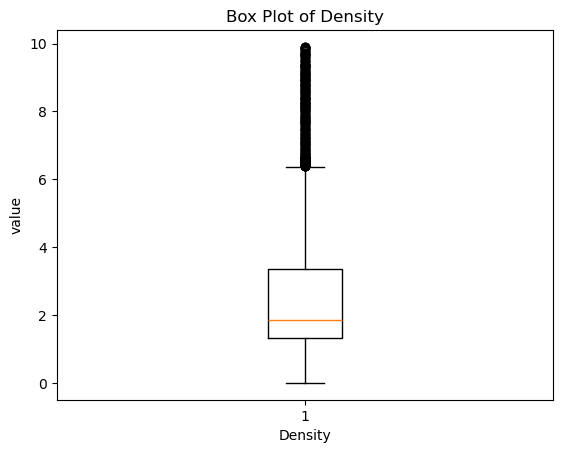

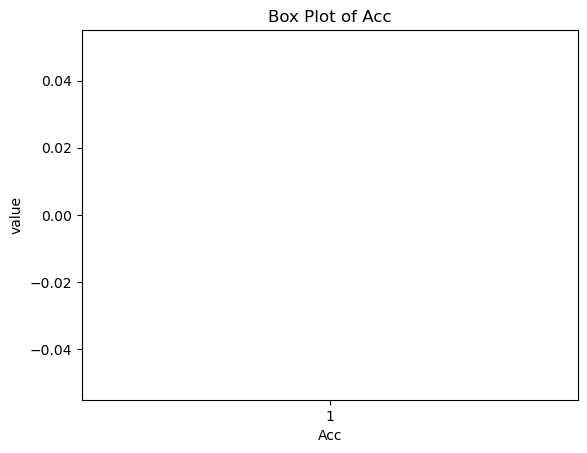

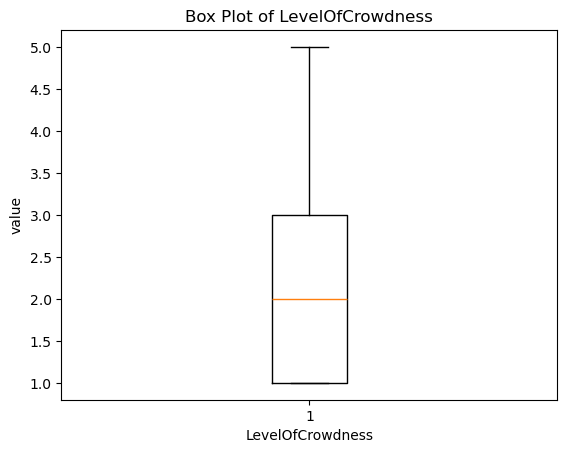

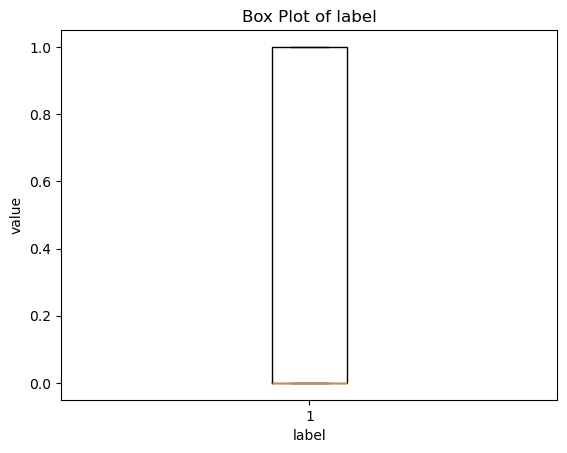

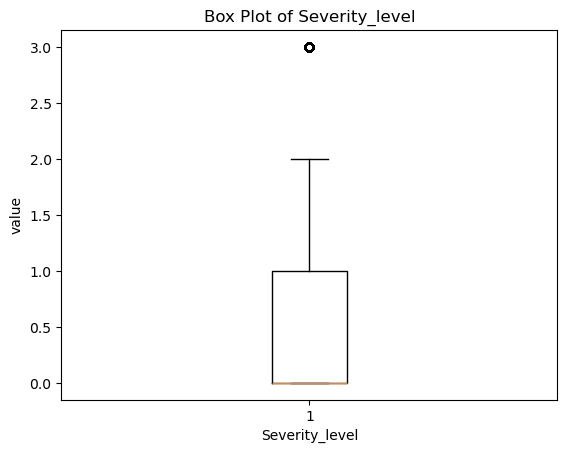

In [111]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('value')
    plt.title(f'Box Plot of {col}')
    plt.show()

# Bivariate Analysis (scatterplots)


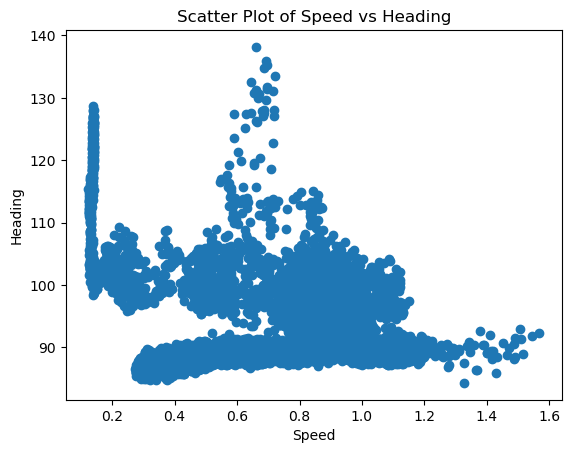

In [116]:
plt.scatter(df['Speed'], df['Heading'])
plt.xlabel('Speed')
plt.ylabel('Heading')
plt.title('Scatter Plot of Speed vs Heading')
plt.show()
